# Section 1: Pulling data from API Endpoints/Cleaning

In [34]:
import os
import pandas as pd
import requests
from sqlalchemy import create_engine
from sqlalchemy import text
from sqlalchemy import exc
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np


In [3]:
load_dotenv()

True

In [5]:
auth_url = 'https://id.twitch.tv/oauth2/token'
cred = {
    'client_id': os.getenv('CLIENT_ID'),
    'client_secret': os.getenv('CLIENT_SECRET'),
    'grant_type':'client_credentials'
        }
r = requests.post(auth_url, data=cred)
data = r.json()
print('Bearer: ' + data['access_token'])

base_url = 'https://api.igdb.com/v4'
header = {'Client-ID': os.getenv('CLIENT_ID'), 
          'Authorization': 'Bearer ' + data['access_token']}

Bearer: 5bo8zrkg2ipz1uoy9ijuqoyaxkugfb


# Games Endpoint

## Games Table

In [6]:
#Set max games to pull
max_games = 5000

In [7]:
i = 0
games_table_df = pd.DataFrame()
while i < max_games/500:
    read = '''fields name, category, first_release_date, status,
            aggregated_rating, aggregated_rating_count, rating, rating_count,
            total_rating, total_rating_count; where category = 0; limit 500; offset '''
    offset = str(500*i)
    semi = ';'
    data = read + offset + semi
    r = requests.post(base_url+'/games', headers=header,
    data= data)
    games_table = r.json()
    games_table_temp = pd.DataFrame(games_table)
    games_table_df=pd.concat([games_table_temp,games_table_df])
    i +=1

In [8]:
games_table_df

,id,category,first_release_date,name,status,rating,rating_count,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count
0,145362,0,1.640909e+09,AdventureQuest 8-Bit: Dungeons & DoomKnights,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,144187,0,1.613693e+09,Joy the Pug,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77351,0,1.179619e+09,Super Marisa World,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101110,0,NaN,CatFish - gotta fish them all!,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,181918,0,NaN,Notes on Crying,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,184733,0,NaN,Get In Shape,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,83445,0,NaN,Josho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,198484,0,1.592698e+09,Madball,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,95157,0,NaN,The Toho Datsui Hanafuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Genres Table

In [9]:
i = 0
genres_table_df = pd.DataFrame()
while i < max_games/500:
    read = 'fields genres; limit 500; offset '
    offset = str(500*i)
    semi = ';'
    data = read + offset + semi
    r = requests.post(base_url+'/games', headers=header,
    data= data)
    genres_table = r.json()
    genres_table_temp =pd.DataFrame(genres_table).explode('genres')
    genres_table_df=pd.concat([genres_table_df,genres_table_temp])
    i +=1

In [10]:
genres_table_df

,id,genres
0,35004,15
0,35004,32
1,176043,10
2,89616,9
2,89616,33
...,...,...
497,8172,10
498,61181,16
498,61181,31
498,61181,34


# Keywords Table

In [11]:
i = 0
keywords_table_df = pd.DataFrame()
while i < max_games/500:
    read = 'fields keywords; limit 500; offset '
    offset = str(500*i)
    semi = ';'
    data = read + offset + semi
    r = requests.post(base_url+'/games', headers=header,
    data= data)
    keywords_table = r.json()
    keywords_table_temp =pd.DataFrame(keywords_table).explode('keywords')
    keywords_table_df=pd.concat([keywords_table_df,keywords_table_temp])
    i +=1

In [12]:
keywords_table_df

,id,keywords
0,35004,NaN
1,176043,5340
1,176043,23861
2,89616,NaN
3,118008,NaN
...,...,...
497,8172,14502
498,61181,78
498,61181,4141
498,61181,23976


# Platforms Table

In [13]:
i = 0
platforms_table_df = pd.DataFrame()
while i < max_games/500:
    read = 'fields platforms; limit 500; offset '
    offset = str(500*i)
    semi = ';'
    data = read + offset + semi
    r = requests.post(base_url+'/games', headers=header,
    data= data)
    platforms_table = r.json()
    platforms_table_temp =pd.DataFrame(platforms_table).explode('platforms')
    platforms_table_df=pd.concat([platforms_table_df,platforms_table_temp])
    i +=1

In [14]:
platforms_table_df

,id,platforms
0,35004,6
1,176043,87
2,89616,34
2,89616,39
3,118008,6
...,...,...
497,8172,52
498,61181,37
499,22320,5
499,22320,37


# Genres Endpoint

## Genres_info Table

In [15]:
r = requests.post(base_url+'/genres', headers=header, data='fields name; limit 500;')
genre_info_table = r.json()
genre_info_table_df = pd.DataFrame(genre_info_table)
genre_info_table_df

,id,name
0,4,Fighting
1,5,Shooter
2,7,Music
3,8,Platform
4,9,Puzzle
5,10,Racing
6,11,Real Time Strategy (RTS)
7,12,Role-playing (RPG)
8,13,Simulator
9,14,Sport


# Keyword Endpoint

## Keyword_info Table

In [16]:
max_keywords = 10_000
i = 0
keywords_info_table_df = pd.DataFrame()
while i < max_keywords/500:
    read = 'fields slug; limit 500; offset '
    offset = str(500*i)
    semi = ';'
    data = read + offset + semi
    r = requests.post(base_url+'/keywords', headers=header,
    data= data)
    keywords_info_table = r.json()
    keywords_info_table_temp =pd.DataFrame(keywords_info_table)
    keywords_info_table_df=pd.concat([keywords_info_table_df,keywords_info_table_temp])
    i +=1

In [17]:
keywords_info_table_df

,id,slug
0,3576,oi
1,4010,argentina
2,13017,fremen
3,1027,adventure
4,19226,fight-trivia
...,...,...
495,14655,big-bertha
496,20275,skydive-proximity-flight-game
497,20705,bentleys-hackpack-game
498,9758,3-d-glasses


# Platform Endpoint

## Platform Table

In [18]:
r = requests.post(base_url+'/platforms', headers=header, data='fields name; limit 500;')
platform_info_table = r.json()
platform_info_table_df = pd.DataFrame(platform_info_table)
platform_info_table_df

,id,name
0,158,Commodore CDTV
1,339,Sega Pico
2,8,PlayStation 2
3,39,iOS
4,94,Commodore Plus/4
...,...,...
194,440,Visual Memory Unit / Visual Memory System
195,441,PocketStation
196,29,Sega Mega Drive/Genesis
197,390,PlayStation VR2


# Section 2: Clean/Format Data

In [19]:
# Renaming df tables to sync with DB Schema
# Games Table:
games_table_df = games_table_df.rename(columns={"id":"game_id"})

# Genre Tables:
genres_table_df = genres_table_df.rename(columns={"id":"game_id", "genres":"genre_id"})
genre_info_table_df = genre_info_table_df.rename(columns={"id":"genre_id", "name":"genre_name"})

# Keyword Tables:
keywords_table_df = keywords_table_df.rename(columns={"id":"game_id", "keywords":"keyword_id"})
keywords_info_table_df = keywords_info_table_df.rename(columns={"id":"keyword_id", "slug":"keyword_name"})

# Platform Tables:
platforms_table_df = platforms_table_df.rename(columns={"id":"game_id", "platforms":"platform_id"})
platform_info_table_df = platform_info_table_df.rename(columns={"id":"platform_id", "name":"platform_name"})

In [20]:
# Converting unix time to datetime format
games_table_df['first_release_date'] = pd.to_datetime(games_table_df['first_release_date'], unit='s', origin='unix')

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


# Section 3: Upload to AWS RDS MySQL Server

In [4]:
engine = create_engine(f"mysql+pymysql://{os.getenv('USER')}:{os.getenv('PASS')}@{os.getenv('RDS_ENDPOINT')}/igdb"
                       .format(host= os.getenv("RDS_ENDPOINT"),
                               port= os.getenv("RDS_PORT"),
                               user=os.getenv('USER'),
                               pw=os.getenv('PASSWORD'),
                               ))

In [23]:
for i in range(len(games_table_df)):
    try:
        games_table_df.iloc[i:i+1].to_sql(name="games",if_exists='append',con = engine, index=False)
    except exc.IntegrityError as e:
        pass

In [24]:
for i in range(len(genres_table_df)):
    try:
        genres_table_df.iloc[i:i+1].to_sql(name="genres",if_exists='append',con = engine, index=False)
    except exc.IntegrityError as e:
        pass

In [25]:
for i in range(len(keywords_table_df)):
    try:
        keywords_table_df.iloc[i:i+1].to_sql(name="keywords",if_exists='append',con = engine, index=False)
    except exc.IntegrityError as e:
        pass

In [26]:
for i in range(len(platforms_table_df)):
    try:
        platforms_table_df.iloc[i:i+1].to_sql(name="platforms",if_exists='append',con = engine, index=False)
    except exc.IntegrityError as e:
        pass

In [27]:
genre_info_table_df.to_sql(name="genres_info",if_exists='replace', con = engine, index=False)
keywords_info_table_df.to_sql(name='keyword_info',if_exists='replace', con= engine, index=False)
platform_info_table_df.to_sql(name="platform_info", if_exists='replace', con= engine, index=False)

199

# Section 4 - Example Queries and Plots

## Top Rated Tables by Game Rating

In [6]:
# Genres with top rated games
query_top10_genre = """SELECT gni.genre_name, AVG(gm.rating*gm.rating_count/gm.rating) AS avg_rating
                    FROM games AS gm
                    INNER JOIN genres AS gn ON gm.game_id = gn.game_id
                    INNER JOIN genres_info AS gni ON gn.genre_id = gni.genre_id
                    GROUP BY gni.genre_id
                    ORDER BY avg_rating DESC
                    LIMIT 10;"""
Query_Top10_Genre = pd.read_sql_query(sql=text(query_top10_genre), con=engine.connect())
Query_Top10_Genre

,genre_name,avg_rating
0,Tactical,48.500000
1,Shooter,24.181818
2,Platform,20.142857
3,Turn-based strategy (TBS),18.818182
4,Fighting,18.541667
5,Arcade,15.650000
6,Pinball,14.000000
7,Music,14.000000
8,Puzzle,12.666667
9,Hack and slash/Beat 'em up,10.769231


In [35]:
# Set up plot color
twitch = '#674ea7'

# Set up plot font
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.it'] = 'Arial:italic'
rcParams['mathtext.rm'] = 'Arial'


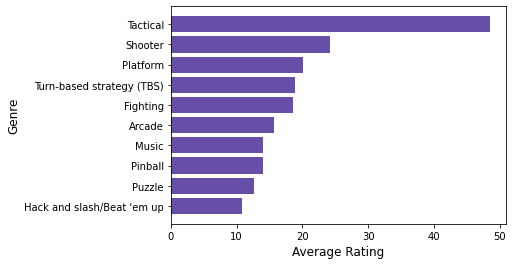

In [37]:
Query_Top10_Genre = Query_Top10_Genre.sort_values(by=['avg_rating'])
Genre = Query_Top10_Genre['genre_name']
Average_Rating = Query_Top10_Genre['avg_rating']
twitch = '#674ea7'


plt.barh(y=Genre, width=Average_Rating, color = twitch)
plt.xlabel("Average Rating", fontsize = 12)
plt.ylabel("Genre", fontsize = 12)
plt.show()

In [8]:
# Keywords with top rated games, where key word appears at least 5 times.
query_top10_keyword="""SELECT ki.keyword_name, AVG(gm.rating*gm.rating_count/gm.rating) AS avg_rating
                    FROM games AS gm
                    INNER JOIN keywords AS k ON gm.game_id = k.game_id
                    INNER JOIN keyword_info AS ki ON k.keyword_id = ki.keyword_id
                    GROUP BY ki.keyword_id
                    HAVING COUNT(ki.keyword_id)>4
                    ORDER BY avg_rating DESC
                    LIMIT 10;"""
Query_Top10_Keyword = pd.read_sql_query(sql=text(query_top10_keyword), con=engine.connect())
Query_Top10_Keyword

,keyword_name,avg_rating
0,puzzles,74.000000
1,coin,57.000000
2,door,56.875000
3,horse,50.000000
4,skeletons,50.000000
5,time-travel,45.000000
6,comedy,35.583333
7,adventure,28.100000
8,frog,25.500000
9,shopping,20.666667


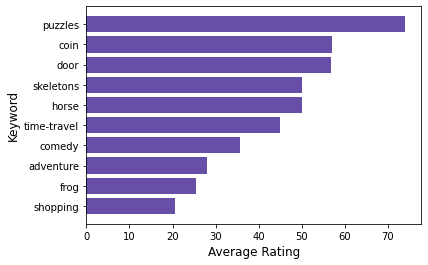

In [38]:
Query_Top10_Keyword = Query_Top10_Keyword.sort_values(by=['avg_rating'])
Keyword = Query_Top10_Keyword['keyword_name']
Average_Rating = Query_Top10_Keyword['avg_rating']

plt.barh(y=Keyword, width=Average_Rating, color = twitch)
plt.xlabel("Average Rating", fontsize = 12)
plt.ylabel("Keyword", fontsize = 12)
plt.show()

In [13]:
# Platforms with top rated games, where platform has at least 25 games
query_top10_platforms = """SELECT pi.platform_name, AVG(gm.rating*gm.rating_count/gm.rating) AS avg_rating
                            FROM games AS gm
                            INNER JOIN platforms AS p ON gm.game_id = p.game_id
                            INNER JOIN platform_info AS pi ON p.platform_id = pi.platform_id
                            GROUP BY pi.platform_id
                            HAVING COUNT(pi.platform_id)>24
                            ORDER BY avg_rating DESC
                            LIMIT 10;"""
Query_Top10_Platforms = pd.read_sql_query(sql=text(query_top10_platforms), con=engine.connect())
Query_Top10_Platforms

,platform_name,avg_rating
0,PlayStation Portable,48.250000
1,DOS,38.166667
2,PlayStation 3,35.800000
3,Amiga,31.000000
4,Wii,29.117647
5,PlayStation,28.000000
6,ZX Spectrum,24.333333
7,Amstrad CPC,24.333333
8,Commodore C64/128/MAX,24.333333
9,Atari ST/STE,23.166667


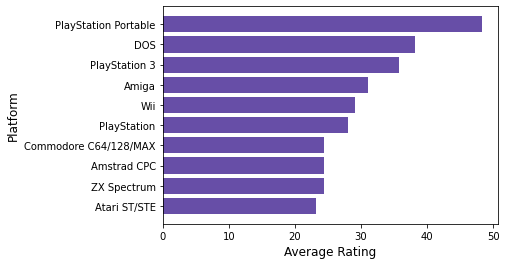

In [39]:
Query_Top10_Platforms = Query_Top10_Platforms.sort_values(by=['avg_rating'])
Platform = Query_Top10_Platforms['platform_name']
Average_Rating = Query_Top10_Platforms['avg_rating']


plt.barh(y=Platform, width=Average_Rating, color = twitch)
plt.xlabel("Average Rating", fontsize = 12)
plt.ylabel("Platform", fontsize = 12)
plt.show()

## What games have the biggest difference between audience and critic score?

In [14]:
# Games IGDB users liked better for games with at least 10 reviews.
query_score_diff = """SELECT name, rating AS user_rating, aggregated_rating AS critic_rating, 
                    rating-aggregated_rating AS rating_diff
                    FROM games
                    WHERE rating_count>4 AND aggregated_rating_count>4
                    AND rating-aggregated_rating>0
                    ORDER BY rating_diff DESC
                    LIMIT 10;"""
Query_Score_Diff_user = pd.read_sql_query(sql=text(query_score_diff), con=engine.connect())
Query_Score_Diff_user

,name,user_rating,critic_rating,rating_diff
0,Adr1ft,83,68,15
1,Animal Crossing: City Folk,80,70,10
2,Just Dance 2016,77,69,8
3,Thief,71,64,7
4,Metroid Prime 3: Corruption,90,86,4
5,Orcs Must Die! 3,80,76,4
6,Sid Meier's Starships,68,66,2


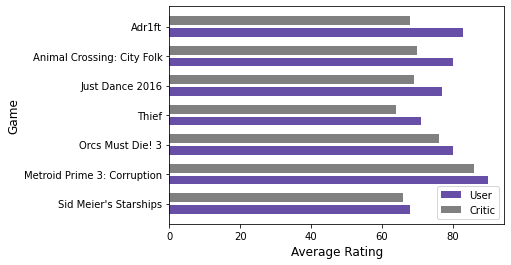

In [40]:
barwidth = 0.25
Query_Score_Diff_user = Query_Score_Diff_user.sort_values(by=['rating_diff'])
Game = Query_Score_Diff_user['name']
Game_axis = np.arange(len(Game))
Rating_diff = Query_Score_Diff_user['rating_diff']
User_rating = Query_Score_Diff_user['user_rating']
Critic_rating = Query_Score_Diff_user['critic_rating']

bar1 = plt.barh(y=Game_axis- .2, width= User_rating, label = 'User Rating', height = 0.3, color = twitch)
bar2 = plt.barh(y=Game_axis + .2, width=Critic_rating, label = 'Critic Rating', height= 0.3, color = "Grey")
plt.yticks(Game_axis, Game)
plt.xlabel("Average Rating", fontsize = 12)
plt.ylabel("Game", fontsize = 12)
plt.legend( (bar1, bar2), ('User', 'Critic'))
plt.show()

In [31]:
# Games critics liked more than users
query_score_diff = """SELECT name, rating AS user_rating, aggregated_rating AS critic_rating, 
                    aggregated_rating-rating AS rating_diff
                    FROM games
                    WHERE rating_count>4 AND aggregated_rating_count>4
                    AND aggregated_rating-rating>0
                    ORDER BY rating_diff DESC
                    LIMIT 10;"""
Query_Score_Diff_crit = pd.read_sql_query(sql=text(query_score_diff), con=engine.connect())
Query_Score_Diff_crit

,name,user_rating,critic_rating,rating_diff
0,Joe Danger 2: The Movie,60,82,22
1,Anarchy Reigns,65,78,13
2,Vampire: The Masquerade - Swansong,51,63,12
3,Guitar Hero 5,72,81,9
4,Dragon Ball: Xenoverse,68,74,6
5,Knack II,66,72,6
6,Lara Croft GO,81,86,5
7,Digimon World: Next Order,68,71,3
8,Strange Brigade,70,73,3
9,I am Bread,53,54,1


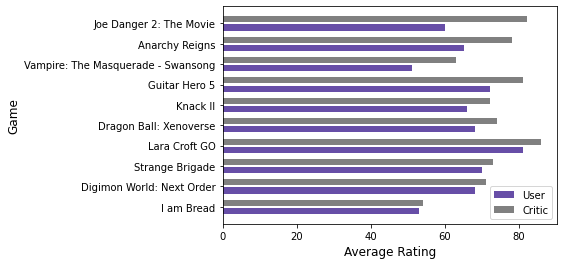

In [41]:
barwidth = 0.25
Query_Score_Diff_crit = Query_Score_Diff_crit.sort_values(by=['rating_diff'])
Game = Query_Score_Diff_crit['name']
Game_axis = np.arange(len(Game))
Rating_diff = Query_Score_Diff_crit['rating_diff']
User_rating = Query_Score_Diff_crit['user_rating']
Critic_rating = Query_Score_Diff_crit['critic_rating']

bar1 = plt.barh(y=Game_axis- .2, width= User_rating, label = 'User Rating', height = 0.3, color = twitch)
bar2 = plt.barh(y=Game_axis + .2, width=Critic_rating, label = 'Critic Rating', height= 0.3, color = "Grey")
plt.yticks(Game_axis, Game)
plt.xlabel("Average Rating", fontsize = 12)
plt.ylabel("Game", fontsize = 12)
plt.legend( (bar1, bar2), ('User', 'Critic'))
plt.show()